In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from kneed import KneeLocator
from sklearn.feature_selection import mutual_info_classif

#Loading the dataset
df = pd.read_csv("winequality-red.csv")
#Wines in the dataset were given a quality rating, separating the wines into low and high quality wines
df['quality'] = df['quality'].replace({3:0, 4:0, 5:0, 6:1, 7:1, 8:1})
#Separating features and target class
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]




Average Accuracy Score: 0.6422838050314466
Average Precision Score: 0.6733028969884028
Average Recall Score: 0.6512585499316006
Average F1 Score: 0.6585872063075173


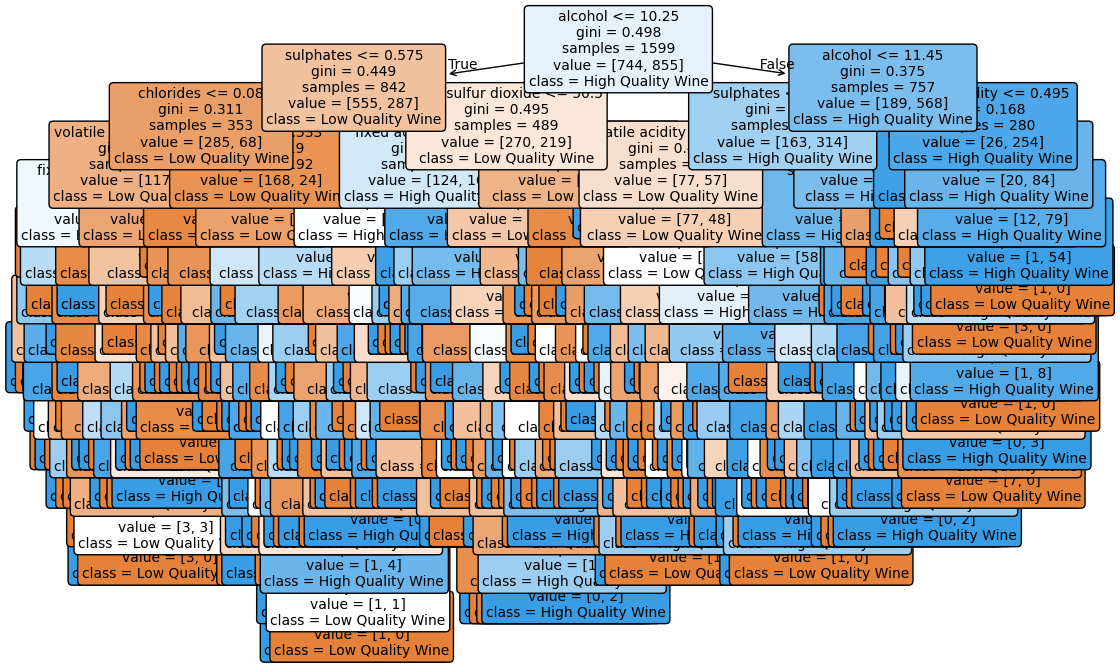

In [3]:
#First model will be a decision tree
dtc = DecisionTreeClassifier(random_state=42)
#Training the classifier
dtc.fit(X, Y)

accuracy_score_dtc = (cross_val_score(dtc, X, Y, cv=10, scoring='accuracy')).mean()
precision_score_dtc = (cross_val_score(dtc, X, Y, cv=10, scoring='precision')).mean()
recall_score_dtc = (cross_val_score(dtc, X, Y, cv=10, scoring='recall')).mean()
f1_score_dtc  = (cross_val_score(dtc, X, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_dtc}')
print(f'Average Precision Score: {precision_score_dtc}')
print(f'Average Recall Score: {recall_score_dtc}')
print(f'Average F1 Score: {f1_score_dtc}')

#Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtc, 
          filled=True,
          feature_names=X.columns,
          class_names=['Low Quality Wine', 'High Quality Wine'],
          rounded=True,
          fontsize=10)        
plt.show()

In [ ]:
#Second model will be Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X, Y)

accuracy_score_gnb = (cross_val_score(gnb, X, Y, cv=10, scoring='accuracy')).mean()
precision_score_gnb = (cross_val_score(gnb, X, Y, cv=10, scoring='precision')).mean()
recall_score_gnb = (cross_val_score(gnb, X, Y, cv=10, scoring='recall')).mean()
f1_score_gnb = (cross_val_score(gnb, X, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_gnb}')
print(f'Average Precision Score: {precision_score_gnb}')
print(f'Average Recall Score: {recall_score_gnb}')
print(f'Average F1 Score: {f1_score_gnb}')

Average Accuracy Score: 0.718561320754717
Average Precision Score: 0.7437682555737805
Average Recall Score: 0.7260191518467853
Average F1 Score: 0.7291633297050873


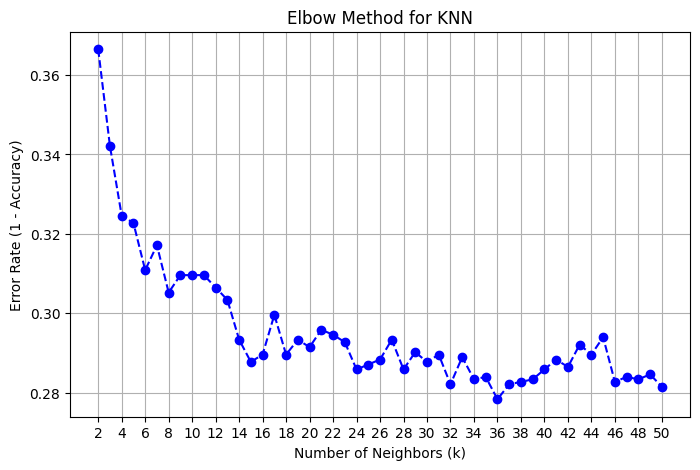

Optimal n_neighbors (Elbow Point): 6


In [ ]:
#Third model will be KNN
#Need to scale the features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#Need to determine optimal number of neighbours, using elbow method and cross validation error rates
error_rates = []
for k in range (2, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='accuracy')).mean()
    error_rates.append(1 - score)

#Plotting the chart for number of neighbours
plt.figure(figsize=(8, 5))
plt.plot(range(2, 51), error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate (1 - Accuracy)")
plt.title("Elbow Method for KNN")
plt.xticks(np.arange(2, 51, step=2))
plt.grid(True)
plt.show()

#Using kneed to determine optimal number of neighbours
knee = KneeLocator(range(2, 51), error_rates, curve="convex", direction="decreasing")
print(f"Optimal n_neighbors (Elbow Point): {knee.elbow}")



In [7]:
#We are now training testing the optimal KNN model. 
#Kneed said k=6 is optimal but we believe 15 is a better value according to the chart
knn = KNeighborsClassifier(n_neighbors=15)

accuracy_score_knn = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='accuracy')).mean()
precision_score_knn = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='precision')).mean()
recall_score_knn = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='recall')).mean()
f1_score_knn = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_knn}')
print(f'Average Precision Score: {precision_score_knn}')
print(f'Average Recall Score: {recall_score_knn}')
print(f'Average F1 Score: {f1_score_knn}')

Average Accuracy Score: 0.7122916666666668
Average Precision Score: 0.7255055134746151
Average Recall Score: 0.7648837209302327
Average F1 Score: 0.7375508877252328


In [8]:
#The fourth model will be logistic regression
lr = LogisticRegression(class_weight='balanced', fit_intercept=True)
#Need to use scaled features
lr.fit(X_scaled, Y)

accuracy_score_lr = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='accuracy')).mean()
precision_score_lr = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='precision')).mean()
recall_score_lr = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='recall')).mean()
f1_score_lr = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_lr}')
print(f'Average Precision Score: {precision_score_lr}')
print(f'Average Recall Score: {recall_score_lr}')
print(f'Average F1 Score: {f1_score_lr}')

#Viewing equation of logistic regression model
coefficients = lr.coef_[0]
intercept = lr.intercept_[0]
equation = f"Logit(P) = {intercept:.4f} "
for i, coef in enumerate(coefficients):
    equation += f"+ ({coef:.4f} * X{i+1}) "
print(equation)

Average Accuracy Score: 0.737932389937107
Average Precision Score: 0.7816803992625767
Average Recall Score: 0.7130232558139535
Average F1 Score: 0.7374635847964772
Logit(P) = 0.1008 + (0.2326 * X1) + (-0.5845 * X2) + (-0.2410 * X3) + (0.0732 * X4) + (-0.1855 * X5) + (0.2394 * X6) + (-0.5431 * X7) + (-0.0977 * X8) + (-0.0587 * X9) + (0.4706 * X10) + (0.9178 * X11) 


/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: So

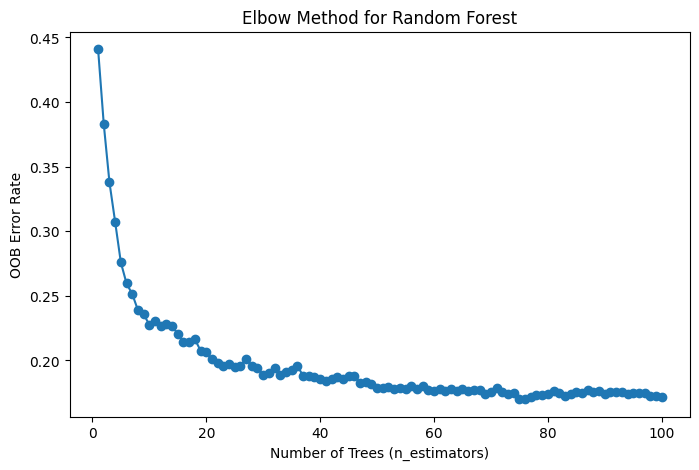

Optimal n_estimators (Elbow Point): 10


In [ ]:
#The fifth model will be a random forest
##Need to determine optimal number of trees, using elbow method and out-of-bag error rates
error_rates = []
for n in range (1, 101):
    rf = RandomForestClassifier(n_estimators=n, random_state=42, oob_score=True, bootstrap=True)
    rf.fit(X, Y)
    error_rates.append(1 - rf.oob_score_)

#Plotting the number of trees
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), error_rates, marker='o', linestyle='-')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("OOB Error Rate")
plt.title("Elbow Method for Random Forest")
plt.show()

#Using kneed to determine the elbow
knee = KneeLocator(range(1, 101), error_rates, curve="convex", direction="decreasing")
print(f"Optimal n_estimators (Elbow Point): {knee.elbow}")


In [10]:
#Now testing the optimal random forest using 10 trees which kneed produced
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X, Y)

accuracy_score_rf = (cross_val_score(rf, X, Y, cv=10, scoring='accuracy')).mean()
precision_score_rf = (cross_val_score(rf, X, Y, cv=10, scoring='precision')).mean()
recall_score_rf = (cross_val_score(rf, X, Y, cv=10, scoring='recall')).mean()
f1_score_rf = (cross_val_score(rf, X, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_rf}')
print(f'Average Precision Score: {precision_score_rf}')
print(f'Average Recall Score: {recall_score_rf}')
print(f'Average F1 Score: {f1_score_rf}')

Average Accuracy Score: 0.7098309748427674
Average Precision Score: 0.7558314517049827
Average Recall Score: 0.6944049247606019
Average F1 Score: 0.709057076100387


In [11]:
#Feature selection using mutual info classifier
mi_scores = mutual_info_classif(X, Y)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_scores_series)  # See MI scores for all features

alcohol                 0.137192
sulphates               0.071172
volatile acidity        0.065887
density                 0.047601
total sulfur dioxide    0.044714
fixed acidity           0.028726
citric acid             0.026330
residual sugar          0.016574
chlorides               0.013970
free sulfur dioxide     0.000953
pH                      0.000000
dtype: float64


In [12]:
#Dropping the 2 features with a 0 MI score
df2 = df.drop(columns = ['free sulfur dioxide', 'pH'])
#Separating features and target class
X = df2.iloc[:, :-1]
Y = df2.iloc[:, -1]

Average Accuracy Score: 0.6559905660377359
Average Precision Score: 0.6781553243987701
Average Recall Score: 0.6721203830369358
Average F1 Score: 0.673221608600014


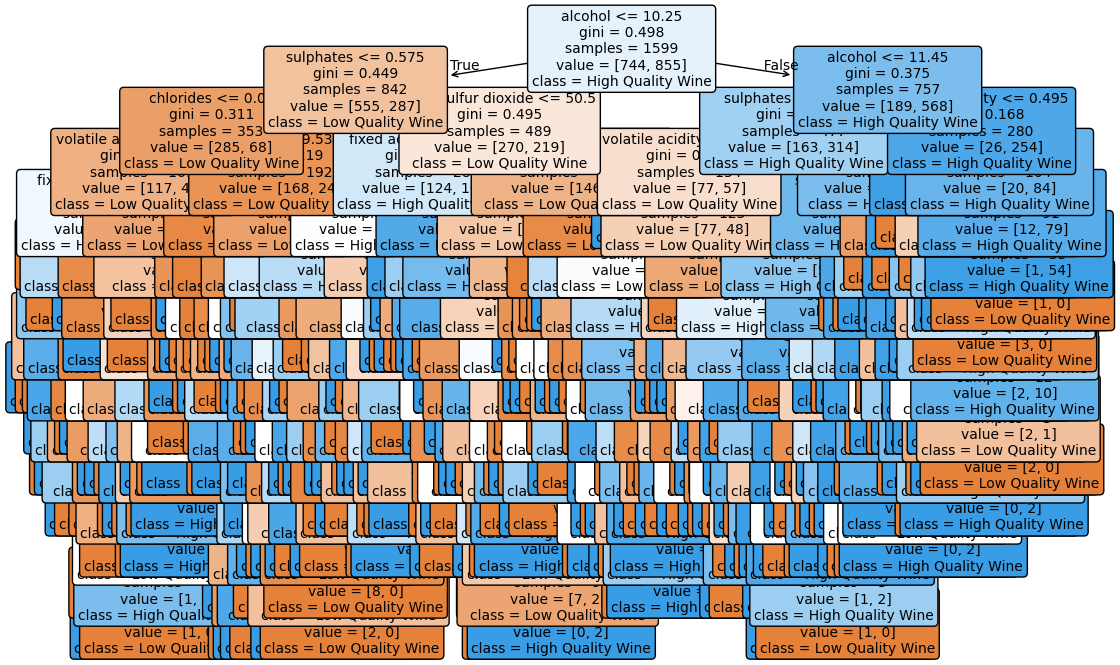

In [13]:
#First model will be a decision tree
dtc = DecisionTreeClassifier(random_state=42)
#Training the classifier
dtc.fit(X, Y)

accuracy_score_dtc = (cross_val_score(dtc, X, Y, cv=10, scoring='accuracy')).mean()
precision_score_dtc = (cross_val_score(dtc, X, Y, cv=10, scoring='precision')).mean()
recall_score_dtc = (cross_val_score(dtc, X, Y, cv=10, scoring='recall')).mean()
f1_score_dtc  = (cross_val_score(dtc, X, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_dtc}')
print(f'Average Precision Score: {precision_score_dtc}')
print(f'Average Recall Score: {recall_score_dtc}')
print(f'Average F1 Score: {f1_score_dtc}')

plt.figure(figsize=(12, 8))
plot_tree(dtc, 
          filled=True,
          feature_names=X.columns,
          class_names=['Low Quality Wine', 'High Quality Wine'],
          rounded=True,
          fontsize=10)
plt.show()

In [14]:
#Second model will be Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X, Y)

accuracy_score_gnb = (cross_val_score(gnb, X, Y, cv=10, scoring='accuracy')).mean()
precision_score_gnb = (cross_val_score(gnb, X, Y, cv=10, scoring='precision')).mean()
recall_score_gnb = (cross_val_score(gnb, X, Y, cv=10, scoring='recall')).mean()
f1_score_gnb = (cross_val_score(gnb, X, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_gnb}')
print(f'Average Precision Score: {precision_score_gnb}')
print(f'Average Recall Score: {recall_score_gnb}')
print(f'Average F1 Score: {f1_score_gnb}')

Average Accuracy Score: 0.7210534591194968
Average Precision Score: 0.7519399296966622
Average Recall Score: 0.7225034199726402
Average F1 Score: 0.7295690423006366


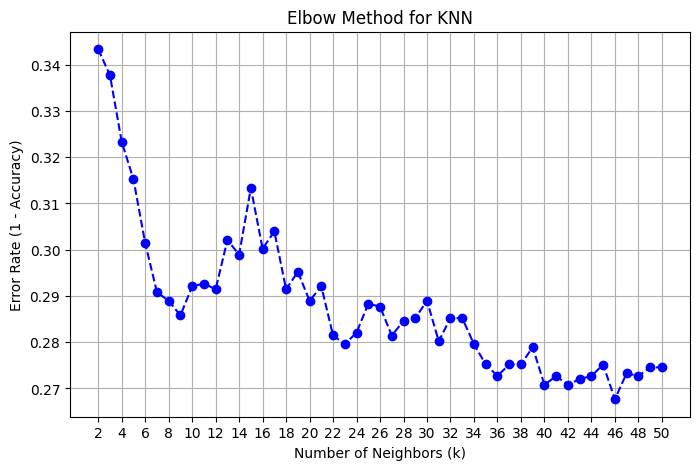

Optimal n_neighbors (Elbow Point): 9


In [16]:
#Third model will be KNN

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

error_rates = []
for k in range (2, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='accuracy')).mean()
    error_rates.append(1 - score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 51), error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate (1 - Accuracy)")
plt.title("Elbow Method for KNN")
plt.xticks(np.arange(2, 51, step=2))
plt.grid(True)
plt.show()

knee = KneeLocator(range(2, 51), error_rates, curve="convex", direction="decreasing")
print(f"Optimal n_neighbors (Elbow Point): {knee.elbow}")

In [ ]:
#We are now testing the optimal KNN model
knn = KNeighborsClassifier(n_neighbors=9)

accuracy_score_knn = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='accuracy')).mean()
precision_score_knn = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='precision')).mean()
recall_score_knn = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='recall')).mean()
f1_score_knn = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_knn}')
print(f'Average Precision Score: {precision_score_knn}')
print(f'Average Recall Score: {recall_score_knn}')
print(f'Average F1 Score: {f1_score_knn}')

Average Accuracy Score: 0.714190251572327
Average Precision Score: 0.7214142632494099
Average Recall Score: 0.7741997264021888
Average F1 Score: 0.7400936504357356


In [17]:
#The fourth model will be logistic regression
lr = LogisticRegression(class_weight='balanced', fit_intercept=True)
lr.fit(X_scaled, Y)

accuracy_score_lr = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='accuracy')).mean()
precision_score_lr = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='precision')).mean()
recall_score_lr = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='recall')).mean()
f1_score_lr = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_lr}')
print(f'Average Precision Score: {precision_score_lr}')
print(f'Average Recall Score: {recall_score_lr}')
print(f'Average F1 Score: {f1_score_lr}')

#Viewing equation of logistic regression model
coefficients = lr.coef_[0]
intercept = lr.intercept_[0]
equation = f"Logit(P) = {intercept:.4f} "
for i, coef in enumerate(coefficients):
    equation += f"+ ({coef:.4f} * X{i+1}) "
print(equation)

Average Accuracy Score: 0.736069182389937
Average Precision Score: 0.7747973892233823
Average Recall Score: 0.7177154582763339
Average F1 Score: 0.7383282777079325
Logit(P) = 0.1066 + (0.3003 * X1) + (-0.6253 * X2) + (-0.2928 * X3) + (0.0961 * X4) + (-0.1691 * X5) + (-0.3671 * X6) + (-0.1380 * X7) + (0.4805 * X8) + (0.9094 * X9) 


/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: So

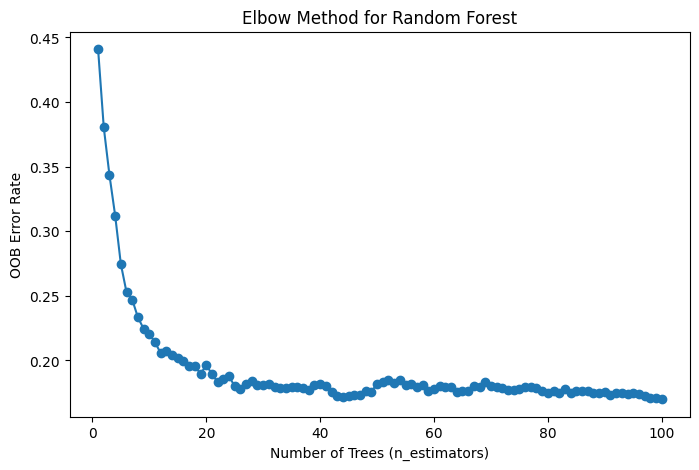

Optimal n_estimators (Elbow Point): 12


In [18]:
#The fifth model will be a random forest
error_rates = []
for n in range (1, 101):
    rf = RandomForestClassifier(n_estimators=n, random_state=42, oob_score=True, bootstrap=True)
    rf.fit(X, Y)
    error_rates.append(1 - rf.oob_score_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), error_rates, marker='o', linestyle='-')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("OOB Error Rate")
plt.title("Elbow Method for Random Forest")
plt.show()

knee = KneeLocator(range(1, 101), error_rates, curve="convex", direction="decreasing")
print(f"Optimal n_estimators (Elbow Point): {knee.elbow}")

In [19]:
#Now testing the optimal random forest
rf = RandomForestClassifier(n_estimators=12, random_state=42)
rf.fit(X, Y)

accuracy_score_rf = (cross_val_score(rf, X, Y, cv=10, scoring='accuracy')).mean()
precision_score_rf = (cross_val_score(rf, X, Y, cv=10, scoring='precision')).mean()
recall_score_rf = (cross_val_score(rf, X, Y, cv=10, scoring='recall')).mean()
f1_score_rf = (cross_val_score(rf, X, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score_rf}')
print(f'Average Precision Score: {precision_score_rf}')
print(f'Average Recall Score: {recall_score_rf}')
print(f'Average F1 Score: {f1_score_rf}')

Average Accuracy Score: 0.7247916666666667
Average Precision Score: 0.7737324400410573
Average Recall Score: 0.7014090287277701
Average F1 Score: 0.7250187322140318
